In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (ensure that the CSV file is in the same directory, or provide the path)
file_path = '/Users/mattsalomon/Downloads/Sample_Hospital_Spending_Per_Patient.csv'
df = pd.read_csv(file_path)
df.head()


,Hospital_ID,State,Cost_Per_Patient,Payment_Per_Patient
0,1,OH,10982.366637,18790.471005
1,2,FL,17246.478098,18950.871088
2,3,GA,16975.176875,15640.974392
3,4,PA,7260.763159,18947.256344
4,5,OH,12622.981651,16075.241122


In [8]:

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Drop rows with missing values for simplicity
df.dropna(inplace=True)

# Quick summary of the dataset
print(df.info())
print(df.describe())


   Hospital_ID State  Cost_Per_Patient  Payment_Per_Patient
0            1    OH      10982.366637         18790.471005
1            2    FL      17246.478098         18950.871088
2            3    GA      16975.176875         15640.974392
3            4    PA       7260.763159         18947.256344
4            5    OH      12622.981651         16075.241122
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hospital_ID          200 non-null    int64  
 1   State                200 non-null    object 
 2   Cost_Per_Patient     200 non-null    float64
 3   Payment_Per_Patient  200 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.4+ KB
None
       Hospital_ID  Cost_Per_Patient  Payment_Per_Patient
count   200.000000        200.000000           200.000000
mean    100.500000      12618.581542         13593.81

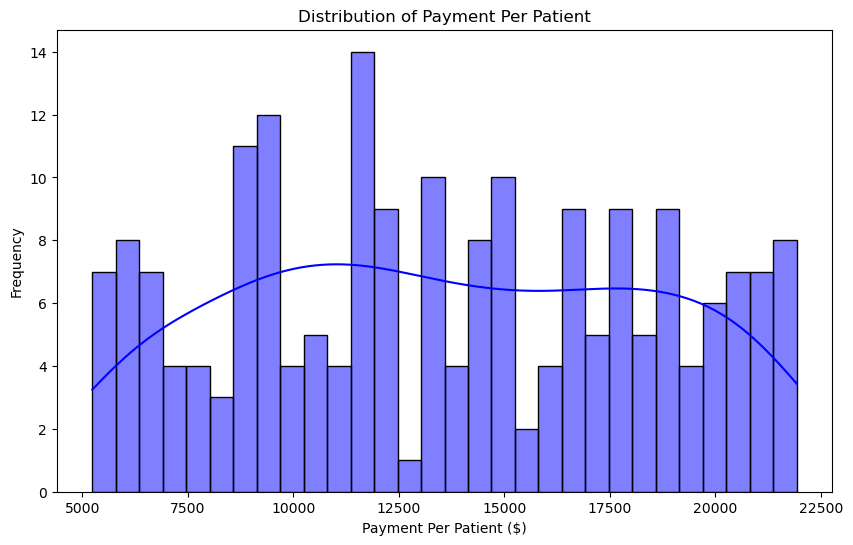

In [9]:

# Basic RCM Analysis
# Assuming that 'Payment' and 'Cost' columns represent revenue cycle elements

# Distribution of Spending per Patient
plt.figure(figsize=(10, 6))
sns.histplot(df['Payment_Per_Patient'], kde=True, bins=30, color='blue')
plt.title('Distribution of Payment Per Patient')
plt.xlabel('Payment Per Patient ($)')
plt.ylabel('Frequency')
plt.show()

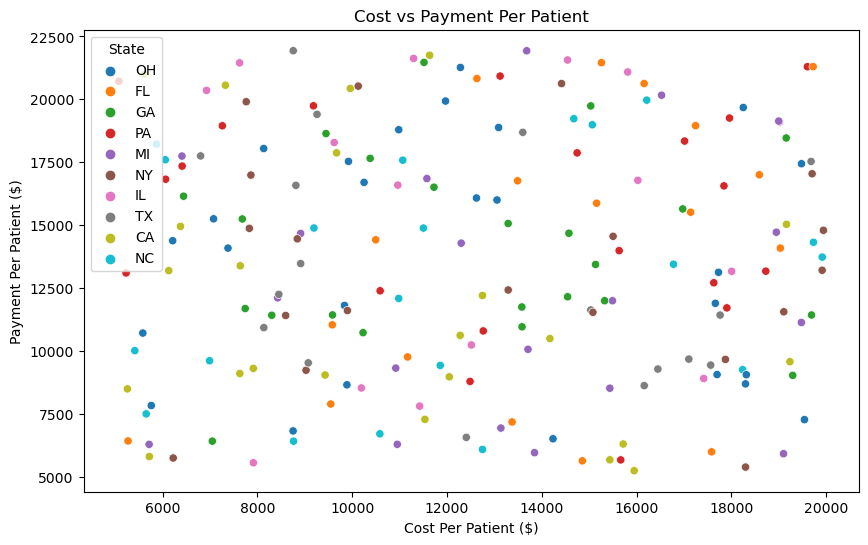

  State  Payment_Per_Patient  Cost_Per_Patient   Revenue_Gap
0    OH         18790.471005      10982.366637   7808.104368
1    FL         18950.871088      17246.478098   1704.392989
2    GA         15640.974392      16975.176875  -1334.202483
3    PA         18947.256344       7260.763159  11686.493185
4    OH         16075.241122      12622.981651   3452.259470


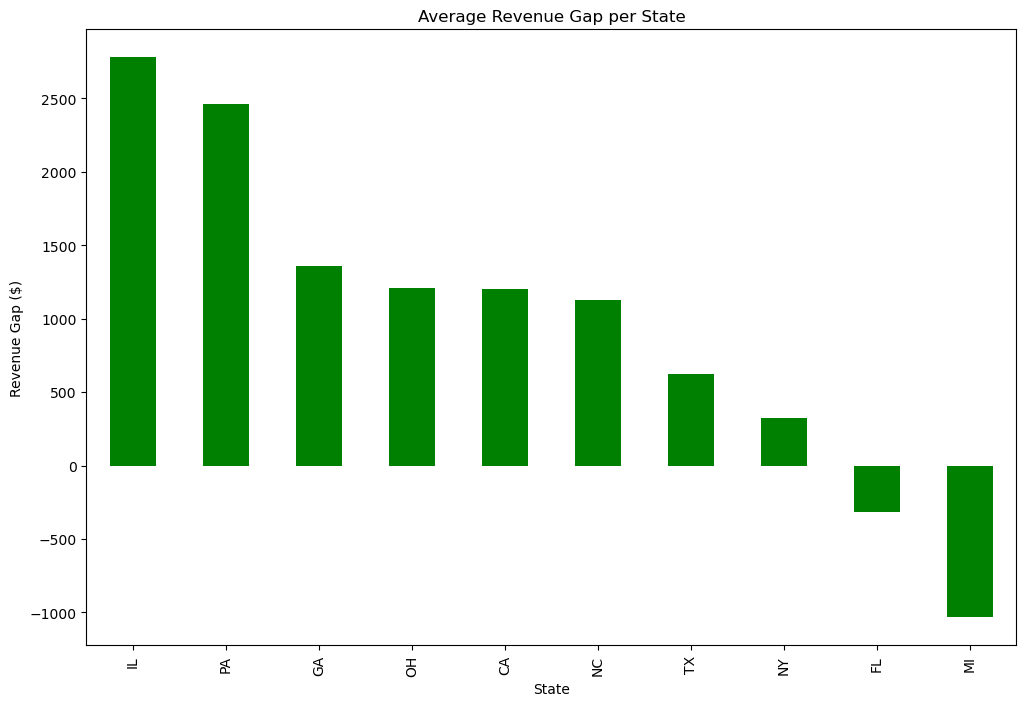

In [10]:


# Scatter plot: Payment vs. Cost per Patient to assess relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Cost_Per_Patient'], y=df['Payment_Per_Patient'], hue=df['State'])
plt.title('Cost vs Payment Per Patient')
plt.xlabel('Cost Per Patient ($)')
plt.ylabel('Payment Per Patient ($)')
plt.show()

# Calculate the Revenue Gap (Payment - Cost)
df['Revenue_Gap'] = df['Payment_Per_Patient'] - df['Cost_Per_Patient']

# Summary of Revenue Gaps
print(df[['State', 'Payment_Per_Patient', 'Cost_Per_Patient', 'Revenue_Gap']].head())

# Bar plot: Average Revenue Gap per State
state_gap = df.groupby('State')['Revenue_Gap'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
state_gap.plot(kind='bar', color='green')
plt.title('Average Revenue Gap per State')
plt.ylabel('Revenue Gap ($)')
plt.show()

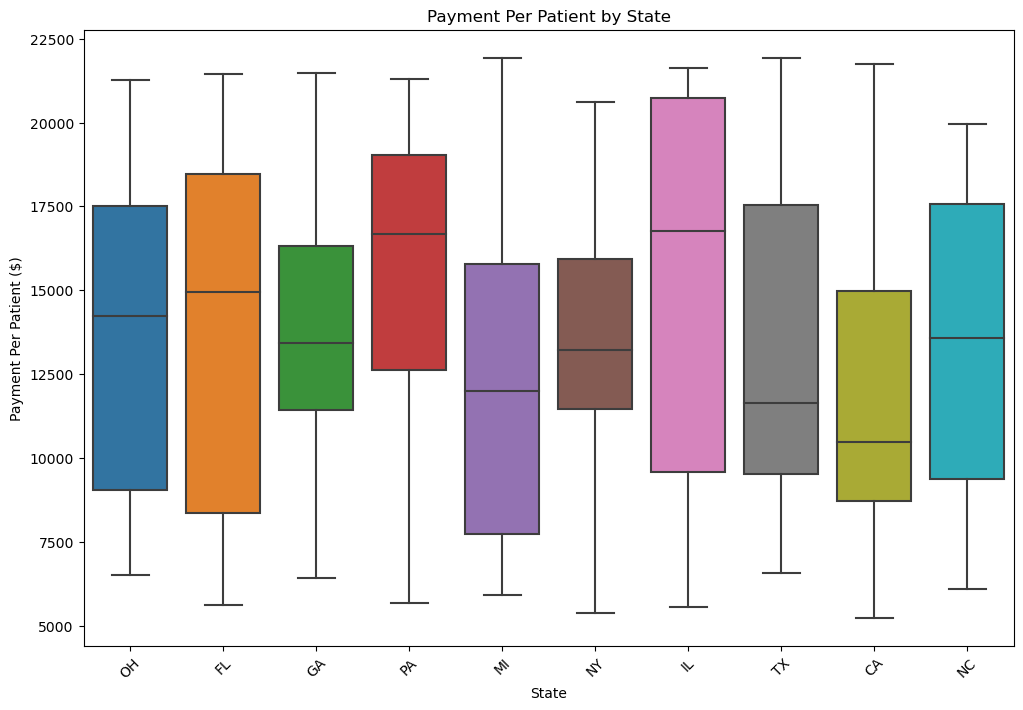

In [11]:
# Box plot for Payment per Patient by State
plt.figure(figsize=(12, 8))
sns.boxplot(x='State', y='Payment_Per_Patient', data=df)
plt.title('Payment Per Patient by State')
plt.xlabel('State')
plt.ylabel('Payment Per Patient ($)')
plt.xticks(rotation=45)
plt.show()

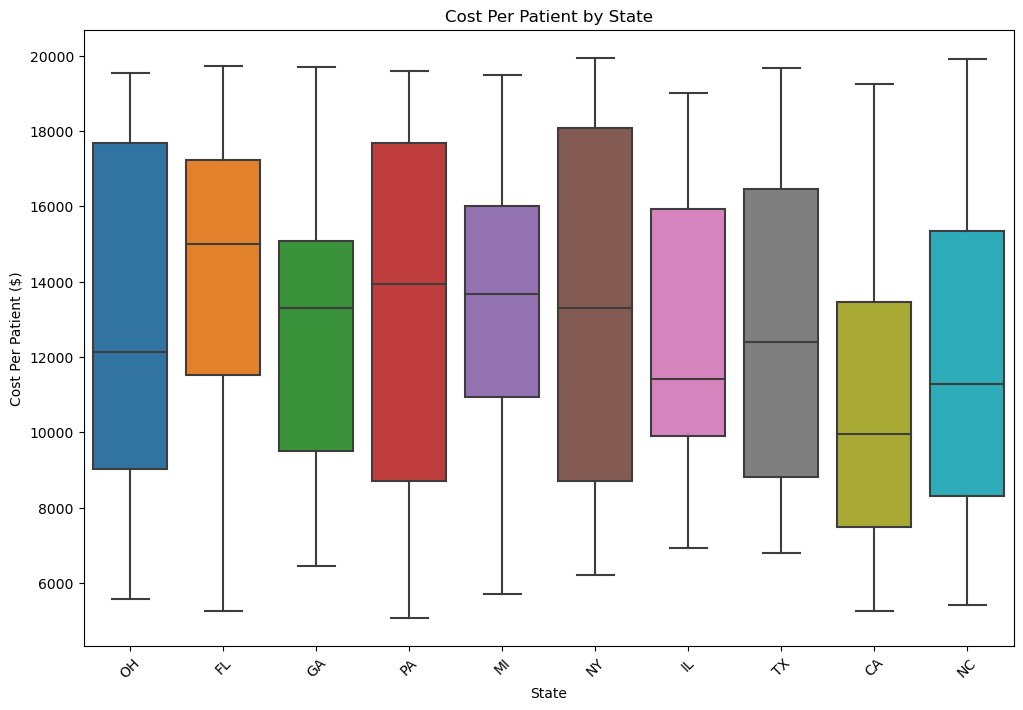

In [12]:


# Box plot for Cost per Patient by State
plt.figure(figsize=(12, 8))
sns.boxplot(x='State', y='Cost_Per_Patient', data=df)
plt.title('Cost Per Patient by State')
plt.xlabel('State')
plt.ylabel('Cost Per Patient ($)')
plt.xticks(rotation=45)
plt.show()

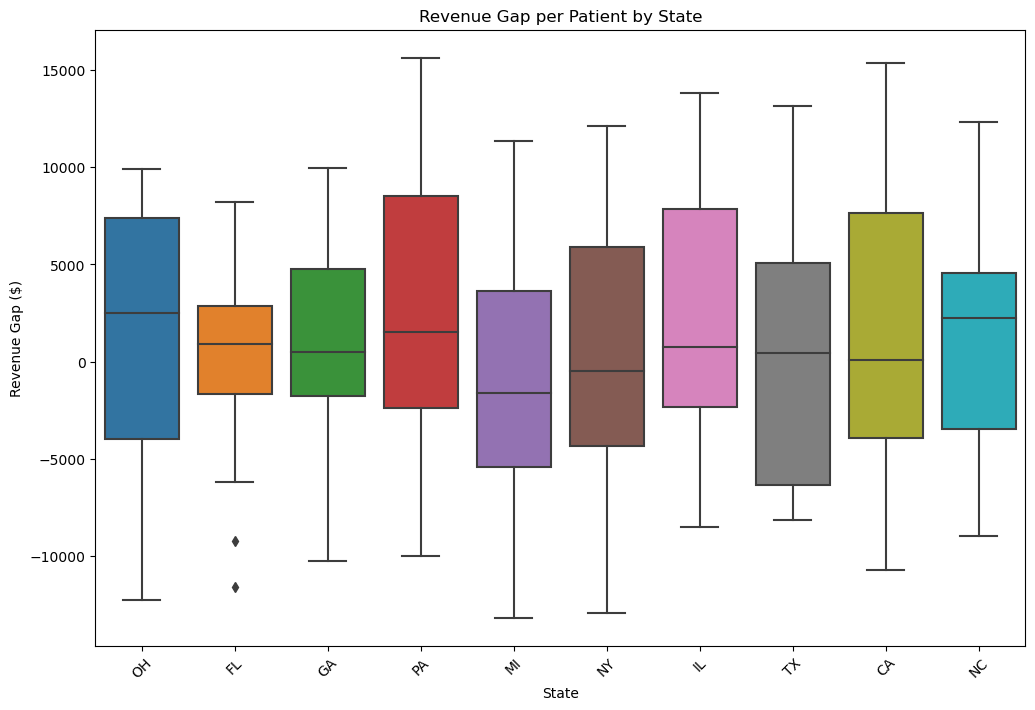

In [13]:
# Box plot for Revenue Gap by State
plt.figure(figsize=(12, 8))
sns.boxplot(x='State', y='Revenue_Gap', data=df)
plt.title('Revenue Gap per Patient by State')
plt.xlabel('State')
plt.ylabel('Revenue Gap ($)')
plt.xticks(rotation=45)
plt.show()

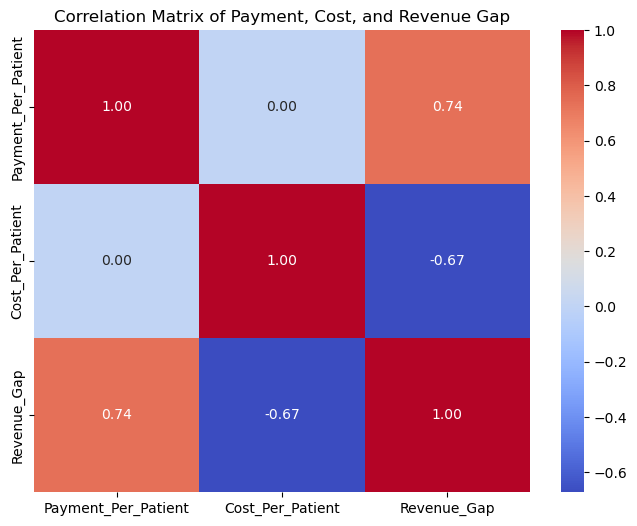

In [14]:
# Heatmap for Correlation between Payment, Cost, and Revenue Gap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Payment_Per_Patient', 'Cost_Per_Patient', 'Revenue_Gap']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Payment, Cost, and Revenue Gap')
plt.show()

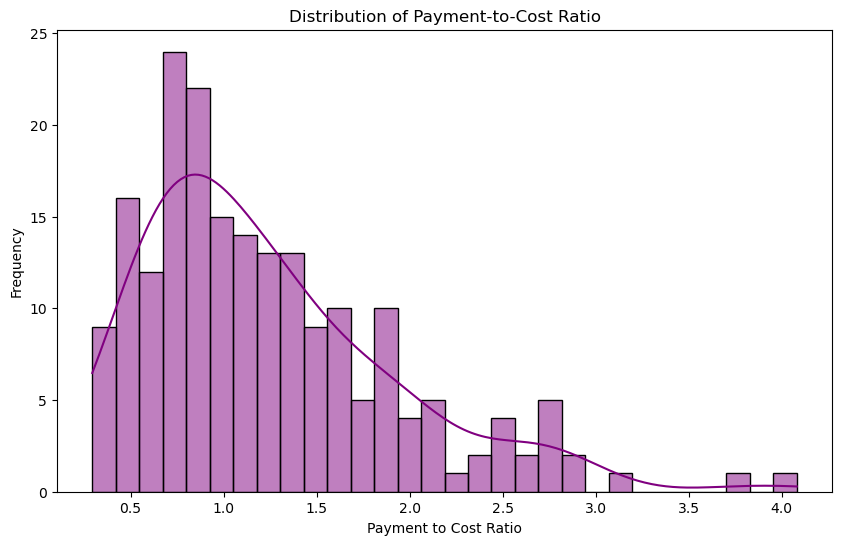

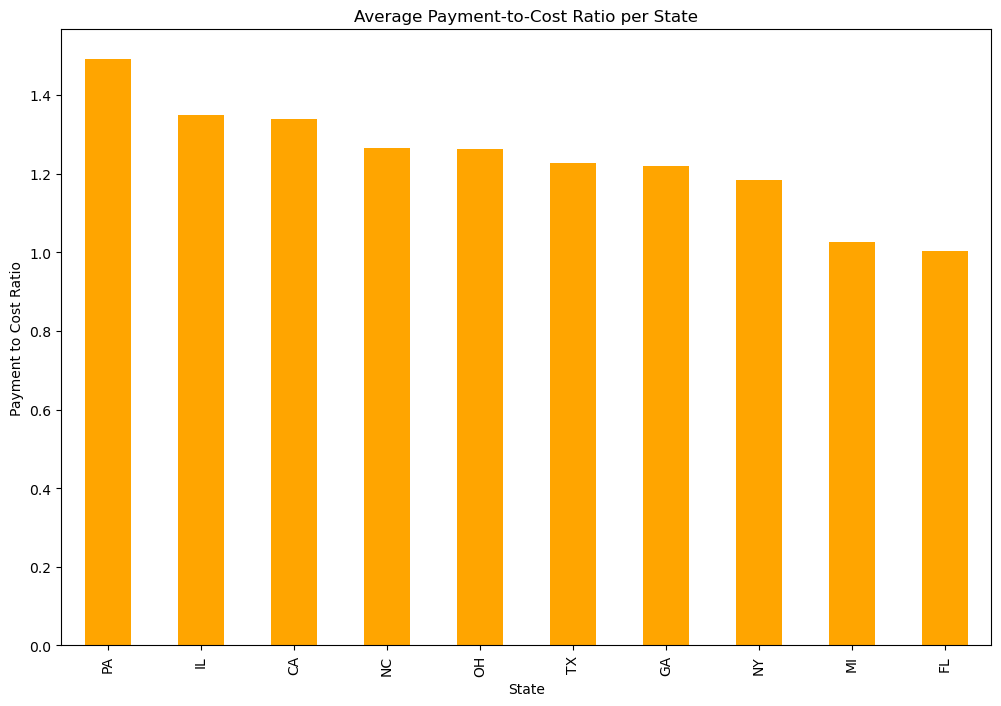

In [15]:
# Calculate Payment-to-Cost Ratio
df['Payment_to_Cost_Ratio'] = df['Payment_Per_Patient'] / df['Cost_Per_Patient']

# Distribution of Payment-to-Cost Ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['Payment_to_Cost_Ratio'], kde=True, bins=30, color='purple')
plt.title('Distribution of Payment-to-Cost Ratio')
plt.xlabel('Payment to Cost Ratio')
plt.ylabel('Frequency')
plt.show()

# Bar plot: Average Payment-to-Cost Ratio per State
state_ratio = df.groupby('State')['Payment_to_Cost_Ratio'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
state_ratio.plot(kind='bar', color='orange')
plt.title('Average Payment-to-Cost Ratio per State')
plt.ylabel('Payment to Cost Ratio')
plt.show()

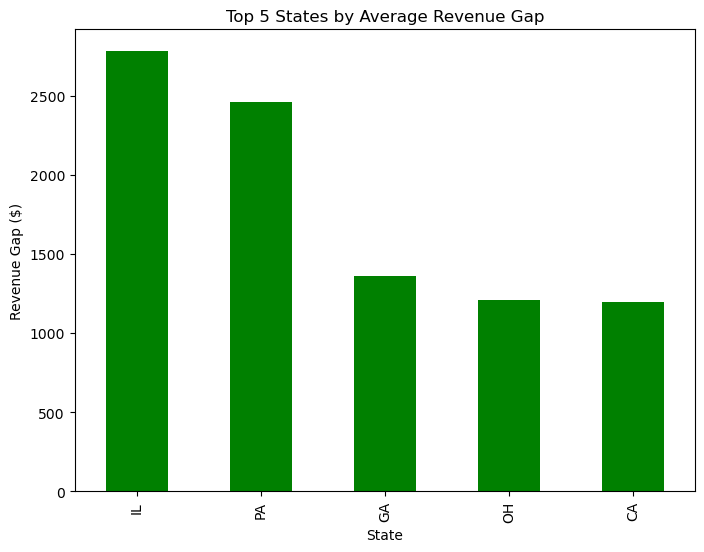

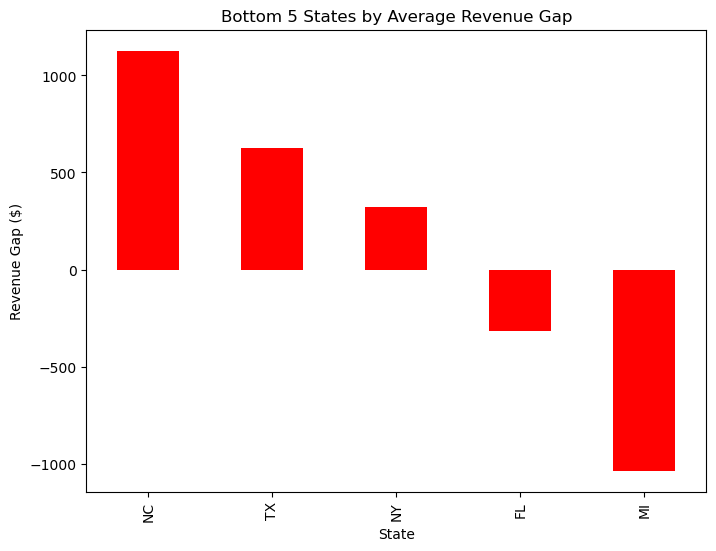

In [16]:
# Top 5 States by Revenue Gap
top_5_states = state_gap.head(5)
bottom_5_states = state_gap.tail(5)

# Plot Top 5 States
plt.figure(figsize=(8, 6))
top_5_states.plot(kind='bar', color='green')
plt.title('Top 5 States by Average Revenue Gap')
plt.ylabel('Revenue Gap ($)')
plt.show()

# Plot Bottom 5 States
plt.figure(figsize=(8, 6))
bottom_5_states.plot(kind='bar', color='red')
plt.title('Bottom 5 States by Average Revenue Gap')
plt.ylabel('Revenue Gap ($)')
plt.show()

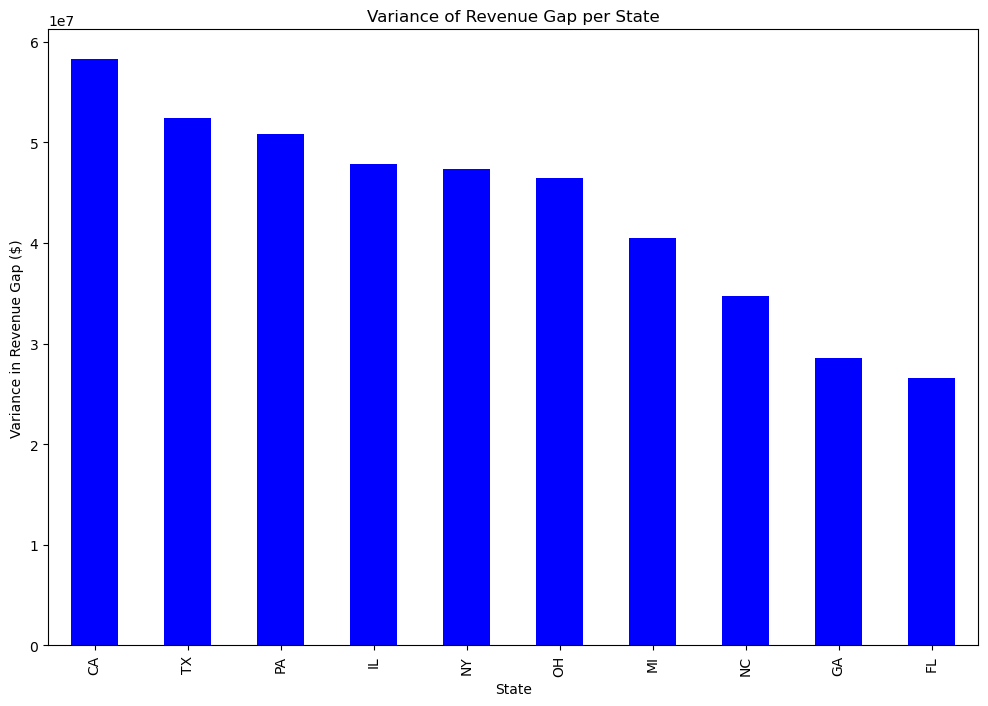

In [17]:
# Calculate the variance of Revenue Gap per State
state_gap_variance = df.groupby('State')['Revenue_Gap'].var().sort_values(ascending=False)

# Plot Revenue Gap Variance per State
plt.figure(figsize=(12, 8))
state_gap_variance.plot(kind='bar', color='blue')
plt.title('Variance of Revenue Gap per State')
plt.ylabel('Variance in Revenue Gap ($)')
plt.show()

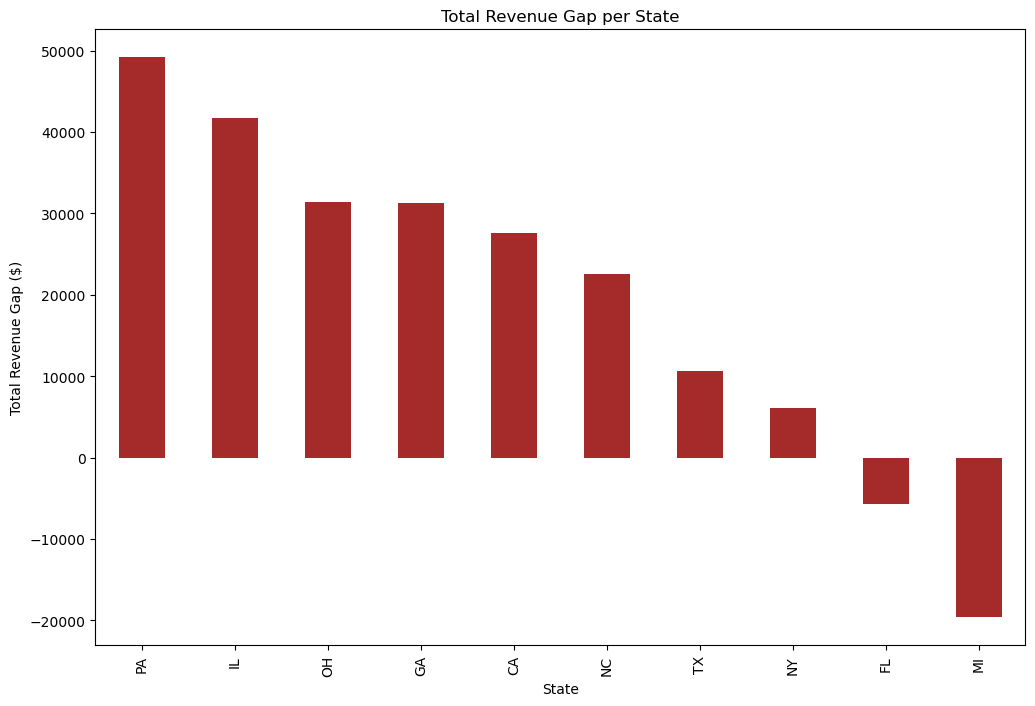

In [18]:
# Total Revenue Gap per State
state_total_gap = df.groupby('State')['Revenue_Gap'].sum().sort_values(ascending=False)

# Plot Total Revenue Gap per State
plt.figure(figsize=(12, 8))
state_total_gap.plot(kind='bar', color='brown')
plt.title('Total Revenue Gap per State')
plt.ylabel('Total Revenue Gap ($)')
plt.show()

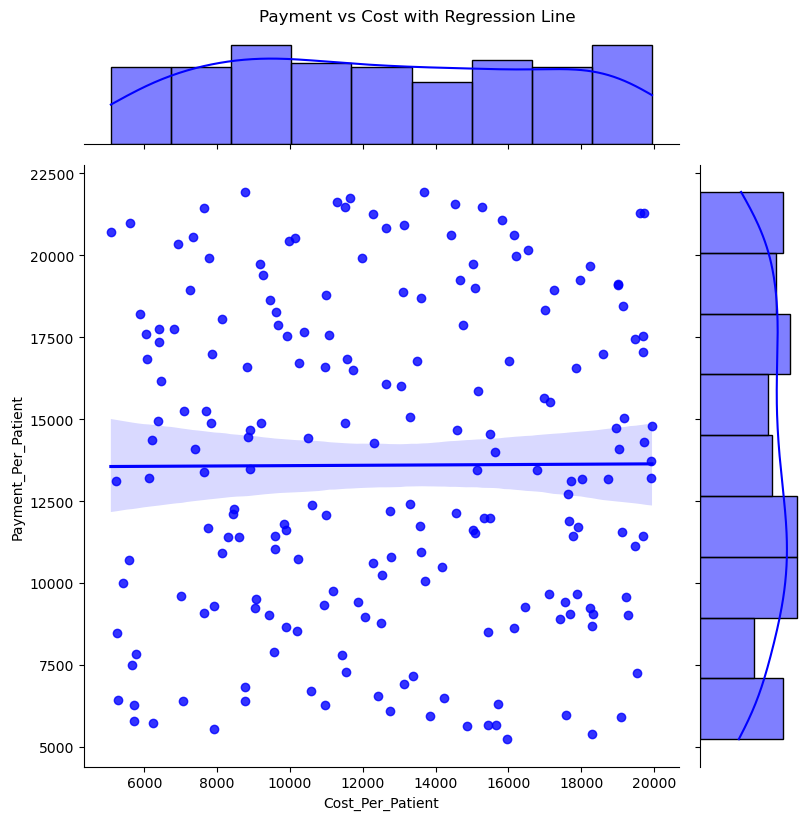

In [19]:
# Joint plot for Payment vs Cost with regression line
sns.jointplot(x='Cost_Per_Patient', y='Payment_Per_Patient', data=df, kind='reg', color='blue', height=8)
plt.suptitle('Payment vs Cost with Regression Line', y=1.02)
plt.show()